In [1]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
import sys
import matplotlib
sns.set_style('darkgrid')
plt.style.use('ggplot')


# Manejo de fechas
import datetime
import matplotlib.dates as mdates
from datetime import date
from dateutil.relativedelta import relativedelta
from sklearn import metrics

pd.set_option('display.max_columns', None)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
#from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

#from sklearn.externals import joblib
from sklearn.utils import resample

from tensorflow import keras
from tensorflow.keras import layers

import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('../n_supply.csv', sep=";")

In [3]:
df

,estimated,real
0,190.5,185.4
1,203.4,168.1
2,43.8,51.3
3,149.8,197.2
4,163.8,143.8
5,168.5,135.3
6,58.4,52.8
7,126.4,138.5
8,56.0,50.2


In [4]:
df
gt=df.real
pred=df.estimated

In [5]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(gt, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(gt, pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(gt, pred)))
mape = np.mean(np.abs((gt - pred) / np.abs(gt)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))
print('R^2:', metrics.r2_score(gt, pred))

Mean Absolute Error (MAE): 19.111111111111104
Mean Squared Error (MSE): 587.6399999999999
Root Mean Squared Error (RMSE): 24.24128709454182
Mean Absolute Percentage Error (MAPE): 14.64
Accuracy: 85.36
R^2: 0.8083735396379331


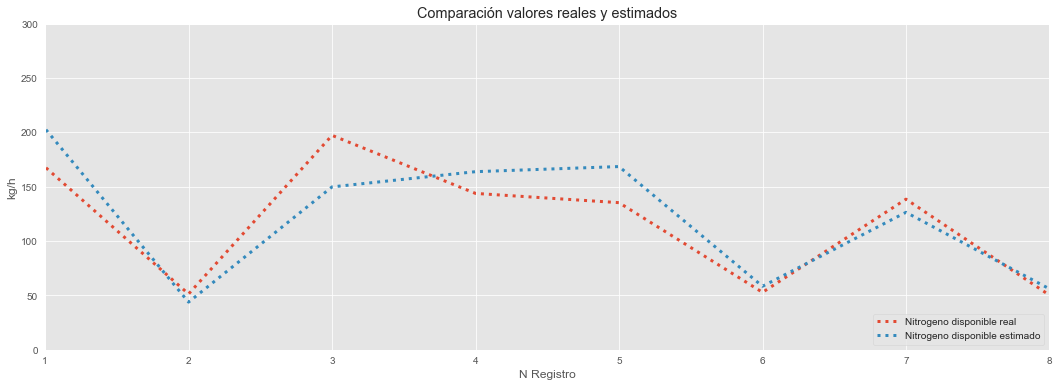

In [6]:
muestras = 9
lw = 3

y_points = np.array(gt[:muestras])
p_points = np.array(pred[:muestras])
plt.rcParams["figure.figsize"] = (18, 6)
plt.plot(y_points, ls = ':', label='Nitrogeno disponible real', lw=lw)
plt.plot(p_points, ls = ':', label='Nitrogeno disponible estimado', lw=lw)
lst = list(range(1,muestras+1))
plt.xticks(lst)
plt.xlim([1, muestras-1])
plt.ylim([0, 300])
plt.xlabel('N Registro')
plt.ylabel('kg/h')
plt.title('Comparación valores reales y estimados')
plt.legend(loc='lower right')
plt.show()



In [7]:
df1= pd.read_csv('../combinaciones.csv', sep=";")

In [8]:
df1

,detalles,rmse,combinacion,comb
0,"['PH', 'SOC', 'KEX', 'PBRAY', 'NrTrees', 'N', ...",20.95,Combinación 1,c1
1,"['SOC', 'KEX', 'PBRAY', 'NrTrees', 'N', 'P', '...",20.37,Combinación 2,c2
2,"['PH', 'SOC', 'KEX', 'PBRAY', 'NrTrees', 'N_su...",105.84,Combinación 3,c3
3,"['PH', 'SOC', 'KEX', 'N_supply']",107.65,Combinación 4,c4
4,"['PH', 'SOC', 'KEX', 'PBRAY', 'NrTrees', 'N','...",30.50,Combinación 5,c5
5,"['PH', 'SOC', 'KEX', 'NrTrees', 'N', 'N_supply']",16.38,Combinación 6,c6
6,"['PH', 'SOC', 'PBRAY','N', 'P', 'K', 'N_supply']",42.72,Combinación 7,c7
7,"['PH', 'SOC', 'N', 'P', 'K', 'N_supply']",43.08,Combinación 8,c8


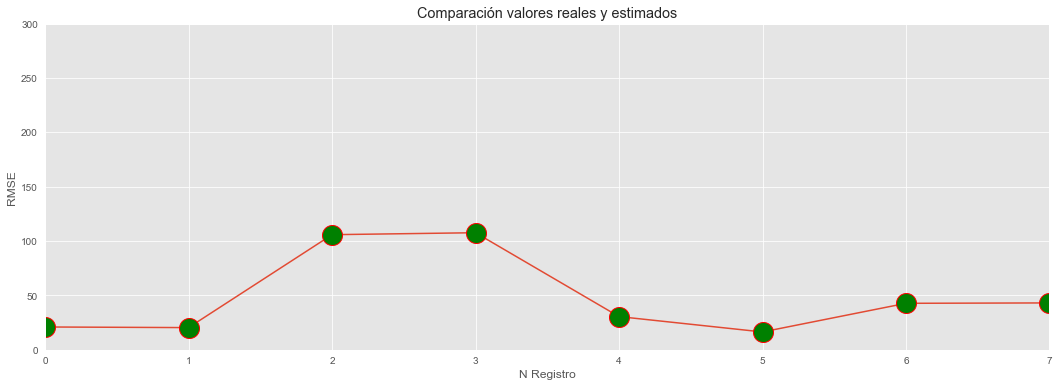

In [9]:
muestras = 8
lw = 3

y_points = np.array(df1.rmse[:muestras])

plt.rcParams["figure.figsize"] = (18, 6)
#plt.plot(y_points, marker="o", label='Nitrogeno disponible real', lw=lw)

plt.plot(y_points, marker="o", markersize=20, markeredgecolor="red", markerfacecolor="green")


#lst = list(range(1,muestras+1))
#plt.xticks(lst)
plt.xlim([0, muestras-1])
plt.ylim([0, 300])
plt.xlabel('N Registro')
plt.ylabel('RMSE')
plt.title('Comparación valores reales y estimados')
#plt.legend(loc='lower right')
plt.show()
